# Airline Passenger Satisfaction 


## Airline passenger satisfaction measurement and service quality improvement


### Content
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)



### Target Variable:

### Satisfaction: Airline satisfaction level categorised as Satisfaction, neutral, or dissatisfaction.

In [415]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

import warnings 
warnings.filterwarnings('ignore')

In [416]:
# Load the dataset
df = pd.read_excel('//Users/nicoleperez/Desktop/IOD/MiniProject 2/satisfaction_2015.xlsx')

In [417]:
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,...,3,3,1,5,3,3,4,3,0,0.0
1,72091,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,...,3,2,1,1,4,4,3,2,0,0.0
2,29663,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,1448,0,3,...,3,3,3,5,3,2,3,3,0,0.0
3,81849,satisfied,Female,disloyal Customer,36,Personal Travel,Eco,1501,0,4,...,4,4,5,4,5,5,5,4,0,0.0
4,83693,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,577,0,5,...,3,3,3,4,5,3,4,3,0,0.0


In [418]:
#Rows and columns
df.shape

(129880, 24)

In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [420]:
# Numerical columns
numerical_features = ["Age", "Flight Distance", "Departure Delay in Minutes", 'Arrival Delay in Minutes']

In [421]:
df.describe()


,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [422]:
#duplicate row check ( Data Cleansing )
df.duplicated().sum()


0

In [423]:
#Missing values
df.isnull().sum()

id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [424]:
df.dropna(inplace=True)
df.shape

(129487, 24)

#### Drop 'ID'

In [425]:
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)
df.shape


(129487, 23)

#### Drop 'Arrival Delay in Minutes'



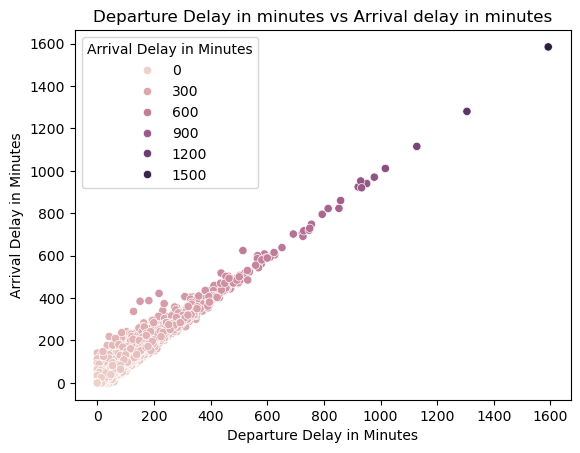

In [553]:
#checking for correlation between departure delays and arrival delays
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=df['Departure Delay in Minutes'], y=df['Arrival Delay in Minutes'], hue=df['Arrival Delay in Minutes'])
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Arrival Delay in Minutes')
plt.title('Departure Delay in minutes vs Arrival delay in minutes')
plt.show()

#### Arrival Delay in Minutes" and "Departure Delay in Minutes" are correlated and have a strong relationship, replacing missing values in "Arrival Delay in Minutes" with the values from "Departure Delay in Minutes" is a reasonable approach. This assumes that the delays are similar for both departure and arrival, and using one to fill missing values in the other makes sense.


In [555]:
df = pd.read_excel('//Users/nicoleperez/Desktop/IOD/MiniProject 2/satisfaction_2015.xlsx')

In [556]:
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)
df.shape


(129880, 23)

In [549]:
#locating null values 
null_values = df.loc[df['Arrival Delay in Minutes'].isnull()]
null_values

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
194,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,491,5,4,5,...,3,3,1,4,3,3,4,3,0,NaN
197,satisfied,Female,disloyal Customer,63,Personal Travel,Eco,776,5,5,4,...,3,3,5,2,5,3,5,3,7,NaN
351,satisfied,Female,Loyal Customer,21,Personal Travel,Eco,3365,0,2,0,...,5,5,4,1,4,2,3,5,20,NaN
452,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,222,0,3,0,...,4,2,1,1,3,4,3,2,0,NaN
916,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,173,0,5,0,...,5,5,4,4,5,3,4,5,24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127457,satisfied,Female,Loyal Customer,41,Business travel,Business,3758,1,1,1,...,5,5,5,5,5,4,5,5,23,NaN
127658,satisfied,Female,Loyal Customer,60,Business travel,Business,3041,3,3,3,...,4,5,5,5,5,4,5,3,0,NaN
127945,satisfied,Male,Loyal Customer,44,Business travel,Business,3383,2,2,3,...,4,5,5,5,5,5,5,4,70,NaN
128337,satisfied,Male,Loyal Customer,39,Business travel,Business,1576,4,4,4,...,5,5,5,5,5,3,5,5,0,NaN


In [691]:
#replacing null values of arrival delay with departure delays
df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna(df["Departure Delay in Minutes"])
df.describe()


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.160102
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.599601
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [561]:
df.isnull().sum()  # check for missing values in the dataset after Data cleansing

satisfaction_v2                      0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [565]:
df.shape

(129880, 23)

In [569]:
df.duplicated().sum()

0

### Columns or Feature Names

In [513]:
for col in df.columns:
    print(col)

satisfaction_v2
Gender
Customer Type
Age
Type of Travel
Class
Flight Distance
Inflight wifi service
Departure/Arrival time convenient
Ease of Online booking
Gate location
Food and drink
Online boarding
Seat comfort
Inflight entertainment
On-board service
Leg room service
Baggage handling
Checkin service
Inflight service
Cleanliness
Departure Delay in Minutes
Arrival Delay in Minutes


In [571]:
#Numerical features
num_features = df.select_dtypes(include=['int64', 'float64'])
for c in num_features.columns:
    print(c)

Age
Flight Distance
Inflight wifi service
Departure/Arrival time convenient
Ease of Online booking
Gate location
Food and drink
Online boarding
Seat comfort
Inflight entertainment
On-board service
Leg room service
Baggage handling
Checkin service
Inflight service
Cleanliness
Departure Delay in Minutes
Arrival Delay in Minutes


In [573]:
#Categorical features
cat_features = df.select_dtypes(include=['object'])
for c in cat_features:
    print(c)

satisfaction_v2
Gender
Customer Type
Type of Travel
Class


In [669]:
# 
for col in category_cols:
    print(col)
    grouped = df.groupby(col)
    mean_type = grouped[score_cols].mean()
    display(mean_type.style.highlight_max(color = 'lightblue', axis = 0))

satisfaction_v2


,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
satisfaction_v2,,,,,,,,,,,,,,
neutral or dissatisfied,2.398423,3.130221,2.549393,2.980055,2.958422,2.658621,3.037998,2.892433,3.019537,2.990443,3.374912,3.042967,3.389601,2.932800
satisfied,3.158609,2.963068,3.026955,2.972850,3.525448,4.025856,3.966417,3.964202,3.856171,3.820054,3.966914,3.649004,3.970990,3.746509


Gender


,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Gender,,,,,,,,,,,,,,
Female,2.720967,3.044067,2.748737,2.978012,3.202507,3.312554,3.481343,3.353025,3.374846,3.310612,3.589842,3.295710,3.597551,3.282614
Male,2.736656,3.071537,2.765258,2.975805,3.207108,3.190916,3.400181,3.363280,3.391444,3.392351,3.675654,3.317141,3.688173,3.290149


Customer Type


,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Customer Type,,,,,,,,,,,,,,
Loyal Customer,2.732319,3.207125,2.768860,2.974222,3.240660,3.373544,3.538944,3.425024,3.416032,3.380066,3.618219,3.324995,3.629218,3.336890
disloyal Customer,2.712532,2.390454,2.703406,2.988982,3.044659,2.713162,3.005971,3.059378,3.235744,3.220648,3.694113,3.222708,3.700084,3.060723


Type of Travel


,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Type of Travel,,,,,,,,,,,,,,
Business travel,2.822896,2.794856,2.882678,3.002486,3.266186,3.455175,3.554146,3.494643,3.434538,3.473883,3.658190,3.292498,3.660732,3.360730
Personal Travel,2.518451,3.644014,2.476099,2.919875,3.067708,2.800582,3.189638,3.053276,3.268047,3.076343,3.573917,3.337000,3.600816,3.120263


Class


,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Class,,,,,,,,,,,,,,
Business,2.775917,2.907915,2.915653,2.985103,3.329955,3.719032,3.763707,3.639350,3.682529,3.646042,3.844852,3.521010,3.846268,3.481998
Eco,2.673944,3.192577,2.602926,2.969576,3.086556,2.814677,3.141813,3.096572,3.119707,3.083778,3.450617,3.124423,3.466497,3.104821
Eco Plus,2.756030,3.209967,2.661991,2.968441,3.110403,2.885559,3.168207,3.120497,3.036234,3.056211,3.351504,3.014557,3.382850,3.118478


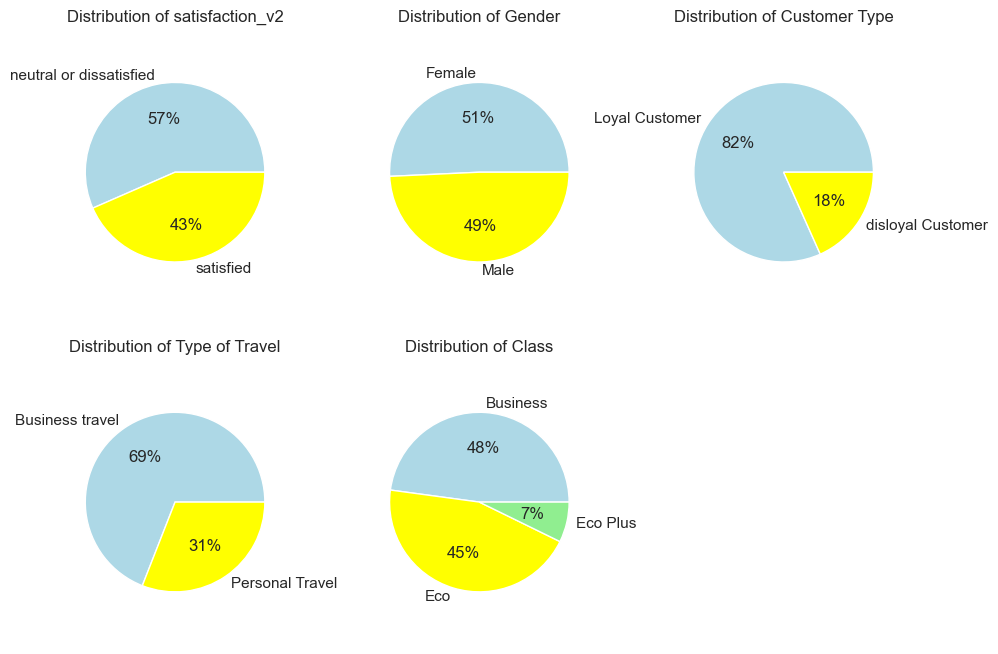

In [667]:
plt.figure(figsize=(10, 10))
# plt.style.use('fivethirtyeight')
# plt.grid(True)

for idx, col in enumerate(category_cols):
    # Histogram for Customer types
    category_counts = df[col].value_counts()
    plt.subplot(3, 3, idx+1)
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.0f%%', colors=['lightblue', 'yellow', 'lightgreen'])
    plt.title(f'Distribution of {col}')
    plt.axis('equal')  
    
plt.tight_layout()
plt.show()

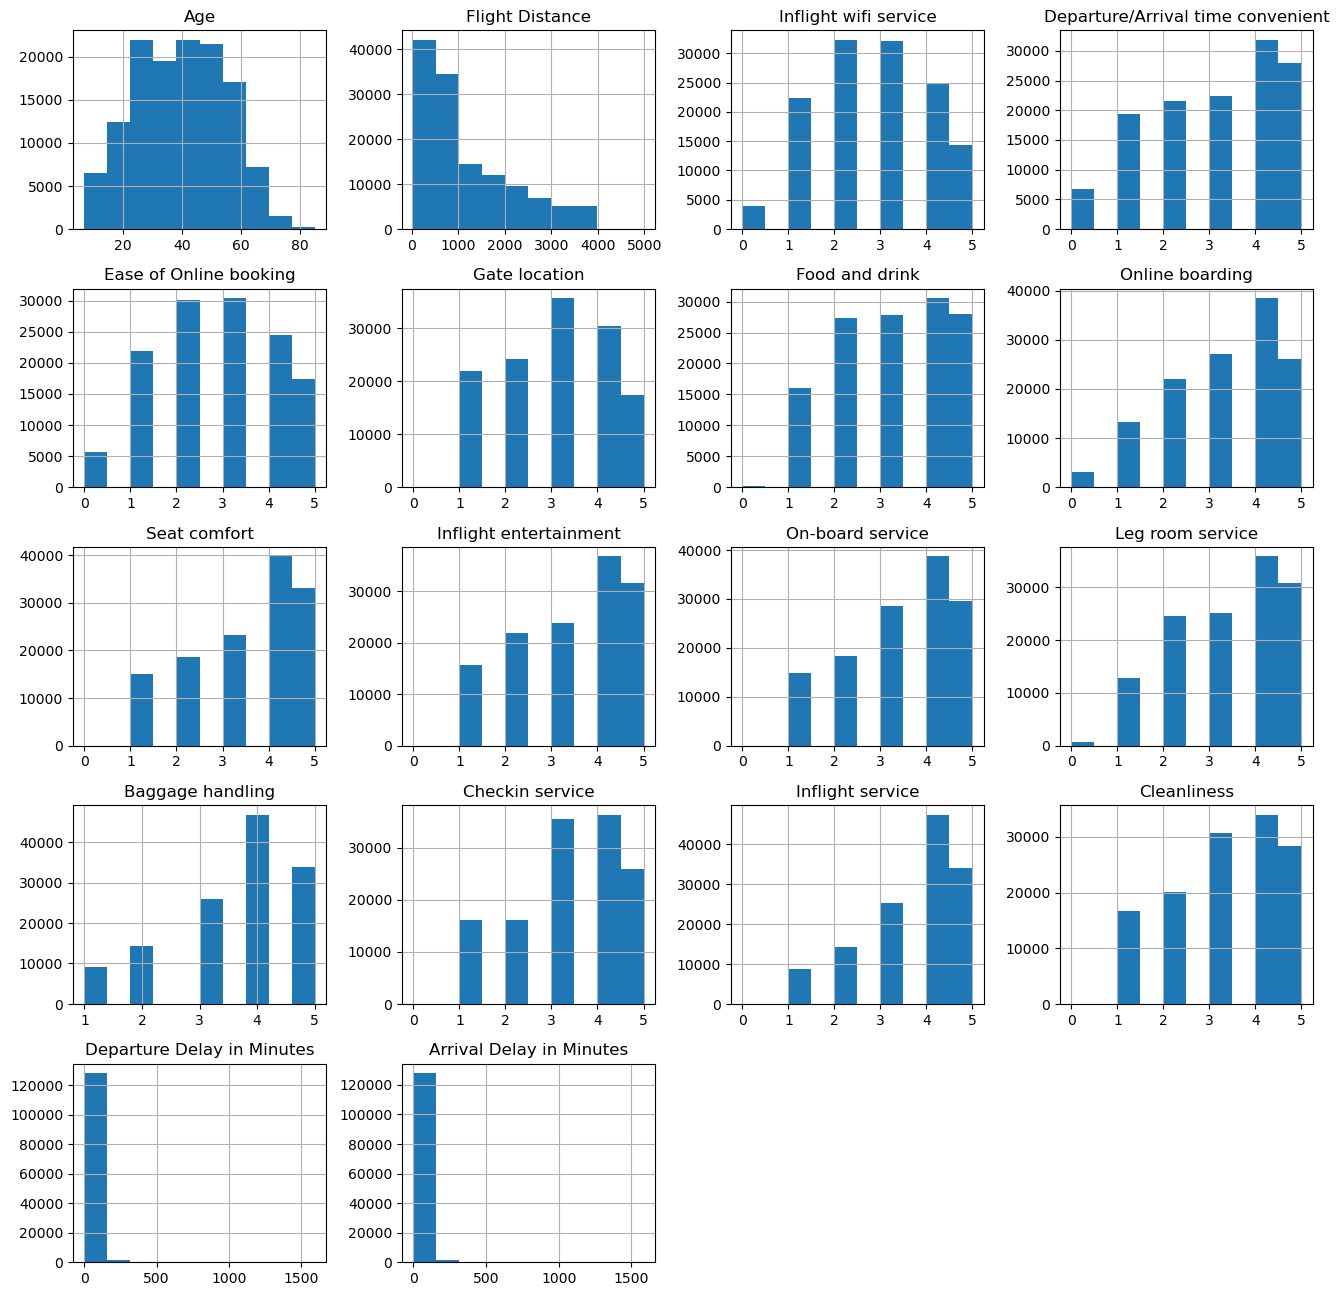

In [596]:
#Distribution of numerical data in different columns of the DataFrame
df.hist(figsize=(16, 16))
plt.show()

### EXPLORATORY DATA ANALYSIS(EDA):

#### Distribution of Target Variable: Visualizing the distribution of the target variable (satisfaction).

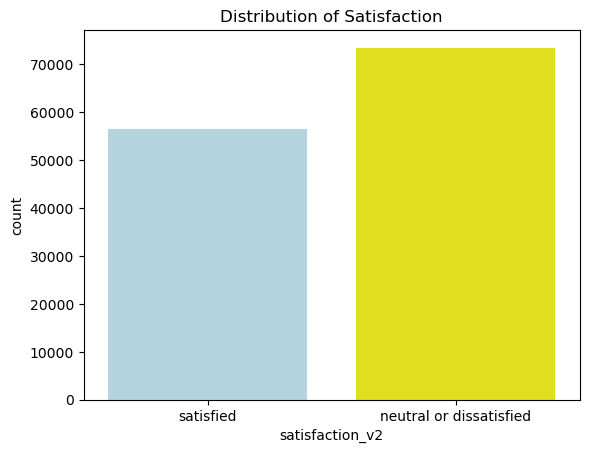

In [582]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['lightblue', 'yellow']

# Distribution of target variable
sns.countplot(x='satisfaction_v2', data=df, hue='satisfaction_v2', palette=colors)
plt.title('Distribution of Satisfaction')
plt.show()

In [586]:
df[["satisfaction_v2"]].value_counts()

satisfaction_v2        
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64

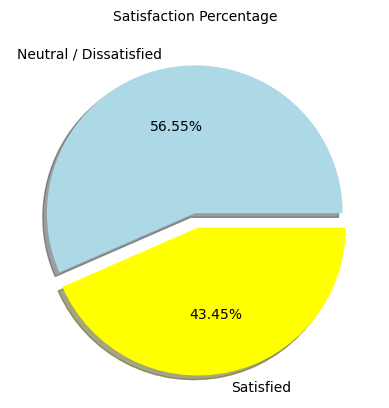

In [588]:
# pie chart that visualizes the percentage distribution of satisfaction levels
colors = ['lightblue', 'yellow']
plt.pie(df['satisfaction_v2'].value_counts(), labels=["Neutral / Dissatisfied", "Satisfied"], explode=[0, 0.1], autopct='%1.2f%%', shadow=True, colors=colors)
plt.title('Satisfaction Percentage', fontsize=10)
plt.show()

### Conclusion:

#### 1) Approximately 56.55% of surveyed passengers expressed neutral or dissatisfied sentiments, while the remaining 43.45 % conveyed satisfaction with the airline.

#### 2) The dataset exhibits no class imbalance (less), as it demonstrates a balanced distribution across both categories: satisfied and neutral/dissatisfied.

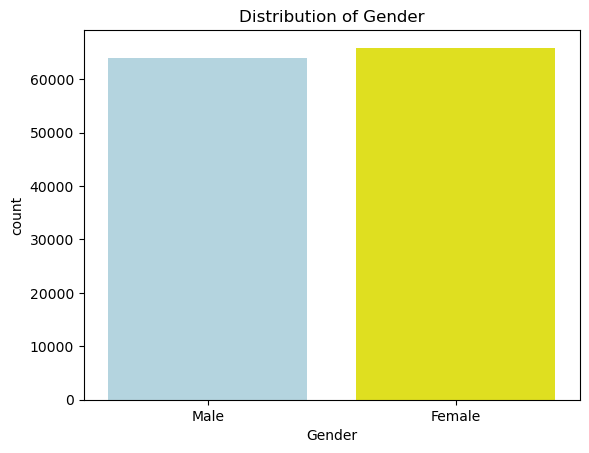

In [598]:
#Gender Distribution:

# Visualizing the distribution of gender among passengers.

colors = ['lightblue', 'yellow']

# Distribution of gender
sns.countplot(x='Gender', data=df, hue='Gender', palette=colors)
plt.title('Distribution of Gender')
plt.show()

In [ ]:
Conclusion based on Gender distribution :

This suggests a relatively balanced gender distribution in the dataset, with a slight majority of female passengers.

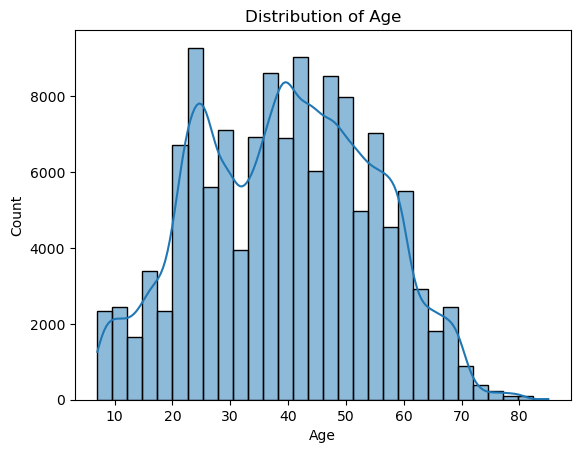

In [602]:
#Age Distribution:
#Exploring the distribution of passenger ages.

sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

Conclusion based on Age distribution :

1) The highest count is observed in the bin range of 22-25 indicating a significant number of passengers falling within this age range.


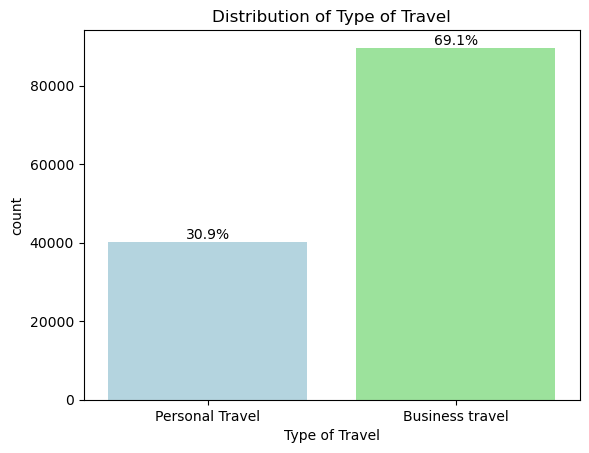

In [604]:
#Type of Travel:
#Visualizing the distribution of the purpose of the flight (Personal Travel, Business Travel).

colors = ['lightblue', 'lightgreen']

# Distribution of the type of travel
ax = sns.countplot(x='Type of Travel', data=df, hue='Type of Travel', palette=colors)
plt.title('Distribution of Type of Travel')

# Adding percentage annotations
total_count = len(df['Type of Travel'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x_position = p.get_x() + p.get_width() / 2
    y_position = p.get_height() + 50
    plt.text(x_position, y_position, percentage, ha='center', va='bottom', fontsize=10, color='black')

plt.show()

Conclusion based on Type of Travel:

Approximately 31.0% of the flights in the dataset are for personal travel.
The majority, around 69.0%, are business-related flights.
This distribution suggests that a significant portion of the surveyed passengers undertook air travel for business purposes, indicating the dataset's emphasis on business-related trips


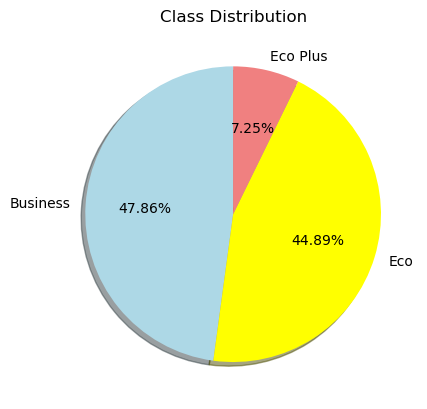

In [614]:
#Class Distribution:
#Exploring the distribution of travel classes in the plane (Business, Eco, Eco Plus).

colors = ['lightblue', 'yellow', 'lightcoral']
plt.pie(df['Class'].value_counts(), labels=df['Class'].value_counts().index, autopct='%1.2f%%', colors=colors, startangle=90, shadow=True)
plt.title('Class Distribution')
plt.show()

Conclusion based on Class Distribution :

The analysis suggests that a significant portion of passengers choose Business Class, making up nearly half of the distribution. Economy Class (Eco) also has a substantial representation, accounting for about 44.89% of the distribution. On the other hand, Eco Plus has a smaller share, with approximately 7.25%

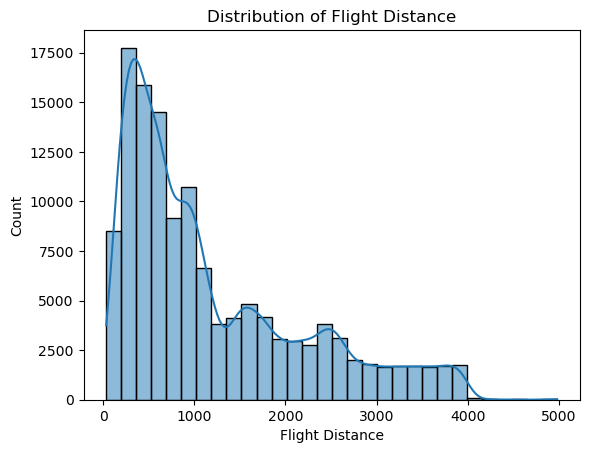

In [618]:
#Flight Distance Distribution:
#Visualizing the distribution of flight distances.

sns.histplot(df['Flight Distance'], bins=30, kde=True)
plt.title('Distribution of Flight Distance')
plt.show()

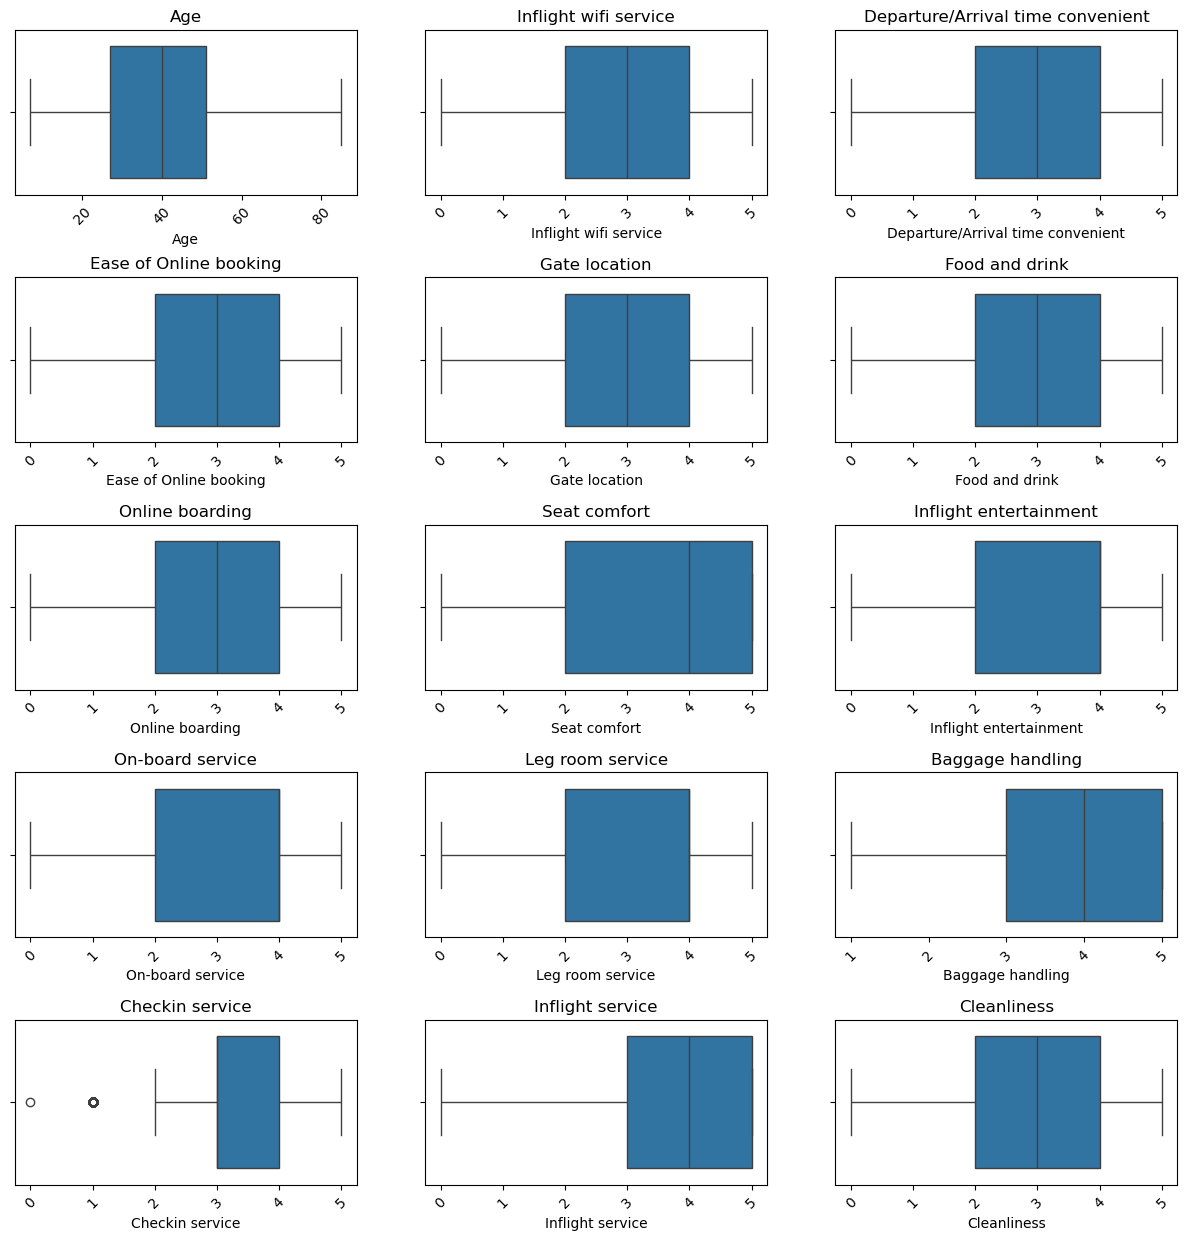

In [622]:
#box plot for discrete variables

labels = ['Age', 'Inflight wifi service', 'Departure/Arrival time convenient',
          'Ease of Online booking', 'Gate location', 'Food and drink',
          'Online boarding', 'Seat comfort', 'Inflight entertainment',
          'On-board service', 'Leg room service', 'Baggage handling',
          'Checkin service', 'Inflight service', 'Cleanliness']

# Create subplots in a 5x3 grid layout
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Plot box plots for each variable
for i, label in enumerate(labels):
    sns.boxplot(x=label, data=df, ax=axes[i]).grid(False)
    axes[i].set_title(label)
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots
for i in range(len(labels), len(axes)):
    fig.delaxes(axes[i])

plt.show()

Conclusion based on Flight Distance Distribution :

The histogram plot of flight distances shows that the majority of flights cover shorter distances, forming a peak on the left side of the graph. However, there are fewer flights that travel longer distances, leading to a tail on the right side. This suggests a pattern where most flights have shorter distances, creating a right-skewed distribution.

EXPLORING RELATIONSHIPS BETWEEN FEATURES AND THE TARGET VARIABLE.



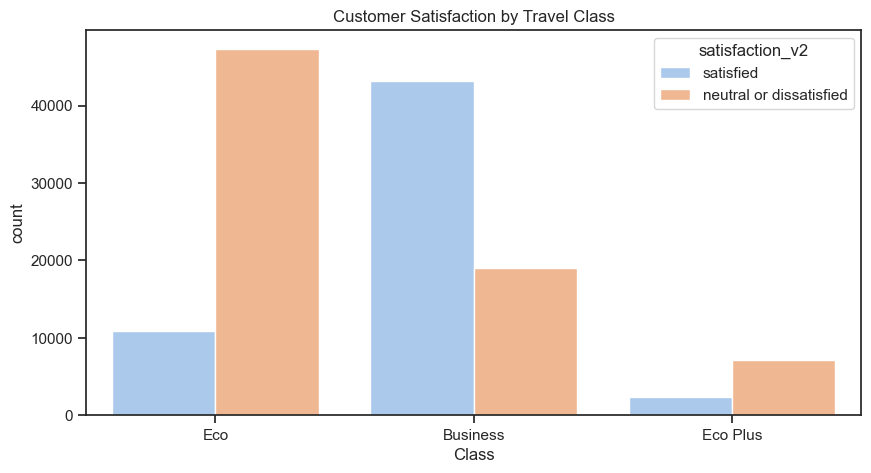

In [635]:
#customer satisfaction distributed across different travel classes (Eco, Business, Eco Plus)

sns.set(style="ticks")
plt.figure(figsize=(10, 5)) 
sns.countplot(x='Class', hue='satisfaction_v2',data=df, palette = 'pastel') # create plot based on the  travel type.
plt.title('Customer Satisfaction by Travel Class')
plt.show()

Conclusion based on Customer Satisfaction and Type of Travel class.

The plot shows customer satisfaction by type of travel class. It illustrates how customer satisfaction changes between each travel class, with Business Class having the highest satisfaction and Eco Class having the highest dissatisfaction

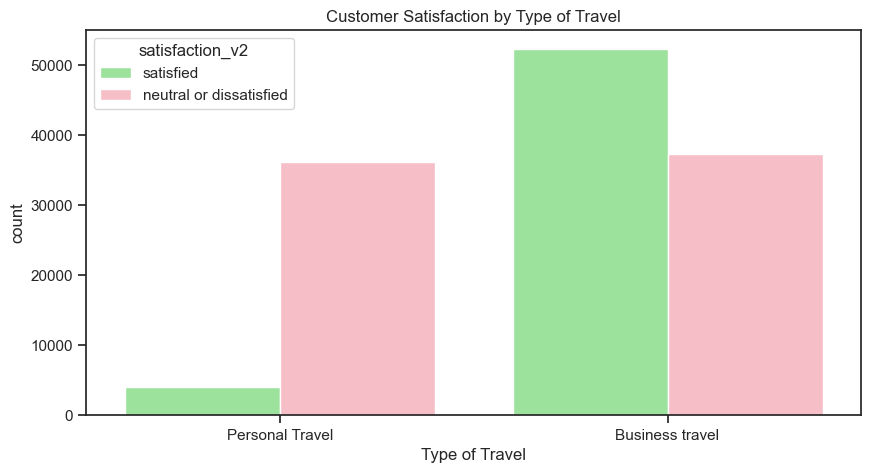

In [639]:
#Customer satisfaction by type of travel

colors=['lightgreen','lightpink']
sns.set(style="ticks") 
plt.figure(figsize=(10, 5))
sns.countplot(x='Type of Travel', hue='satisfaction_v2',data=df, palette= colors) # Creating a plot based on travel type.
plt.title('Customer Satisfaction by Type of Travel') #labeling the title.
plt.show()

Conclusion based on Type of travel and customer satisfaction:

The plot shows that customers who engaged in business travel have the highest count of satisfied individuals compared to personal travel. The light pink color (indicating satisfaction) is more dominant for the "Business Travel" category, suggesting a higher proportion of satisfied customers within this group.

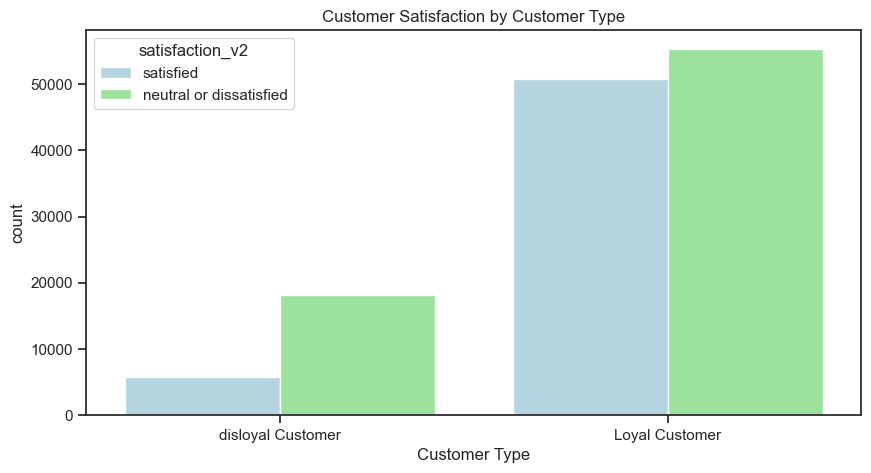

In [644]:
#Customer satisfaction by customer type

colors=['lightblue','lightgreen']
sns.set(style="ticks") #Creating a bankground.
plt.figure(figsize=(10, 5))
sns.countplot(x='Customer Type', hue='satisfaction_v2',data=df,palette=colors)# Creating a plot based on customer type.
plt.title('Customer Satisfaction by Customer Type') #labeling the title.
plt.show()

Conclusion based on customer type:

The countplot displays the number of satisfied and dissatisfied customers, placing them into different categories based on their loyalty status. Here disloyal customers are least satisfied.

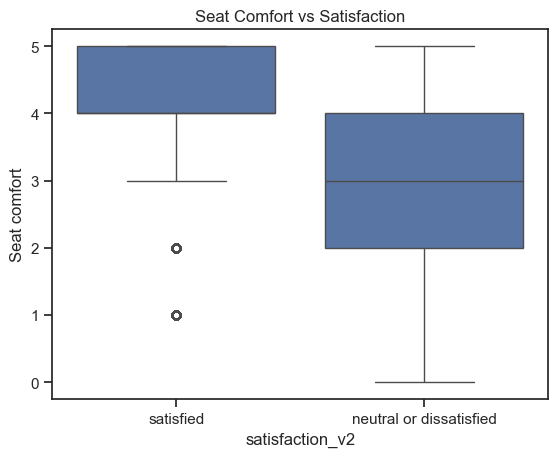

In [649]:
# Boxplot for Seat Comfort and Satisfaction

sns.boxplot(x='satisfaction_v2', y='Seat comfort', data=df)
plt.title('Seat Comfort vs Satisfaction')
plt.show()

Conclusion based on Seat Comfort and satisfaction :

For passengers who are satisfied ('satisfied'), their seat comfort ratings typically fall within the range of 4 to 5.

For passengers who are neutral or dissatisfied ('neutral/dissatisfied'), their seat comfort ratings tend to be in the range of 2 to 4, with a midpoint around 3.

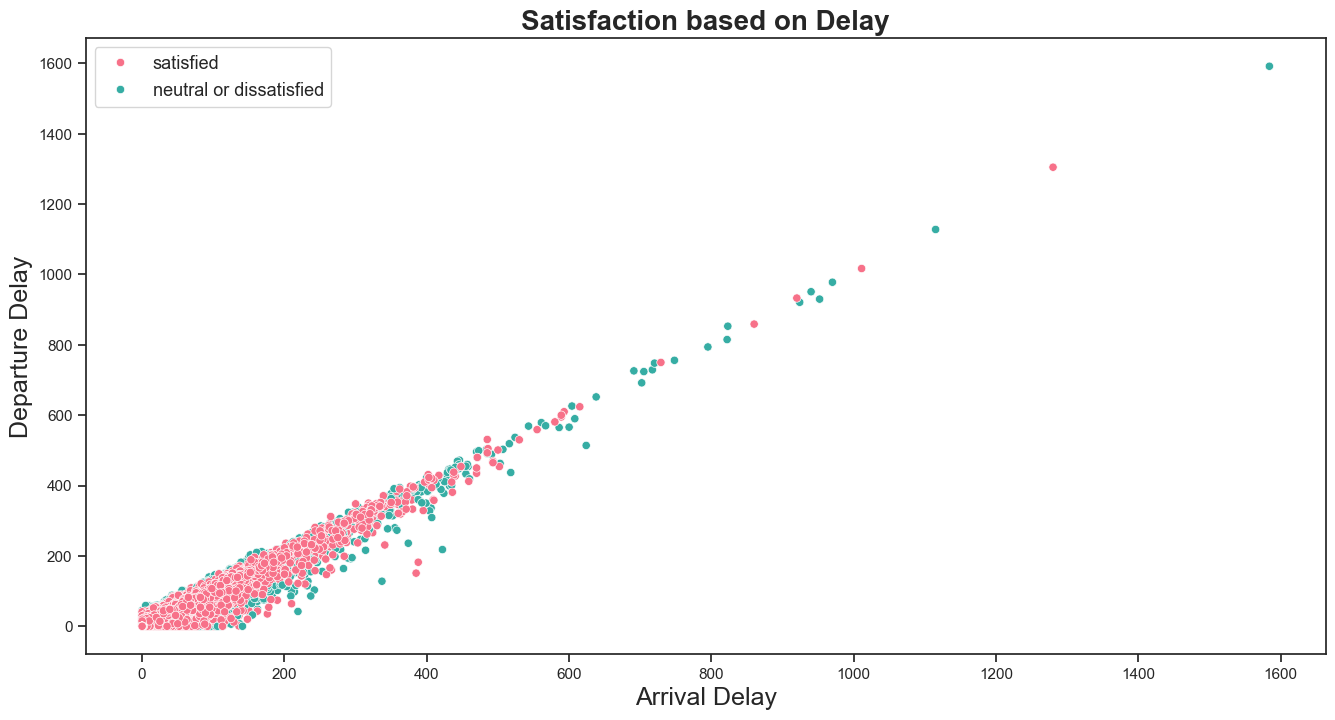

In [654]:
# Scatter plot for Arrival/Departure delays and Satisfaction

sns.set_style("ticks")
plt.figure(figsize=(16,8))

plt.title('Satisfaction based on Delay',size=20,fontweight='bold')
sns.scatterplot(y='Departure Delay in Minutes',data=df,x='Arrival Delay in Minutes',hue='satisfaction_v2',palette='husl')
plt.xlabel('Arrival Delay',size=18)
plt.ylabel('Departure Delay',size=18)
plt.legend(fontsize='13')
plt.show()

Conclusion based on Delay:

The longer the delay is more people are Dissatisfied and less are Satisfied, which is expected.

Heatmap
The heatmap visually represents the correlation between numerical features in the dataset. It helps identify patterns and relationships between different variables. The replaced 'satisfaction' column (now consisting of 1s and 0s) allows for a quantitative analysis of how numerical features correlate with the satisfaction level. The annotated values in the heatmap provide information about the strength and direction of the correlations.

<Axes: >

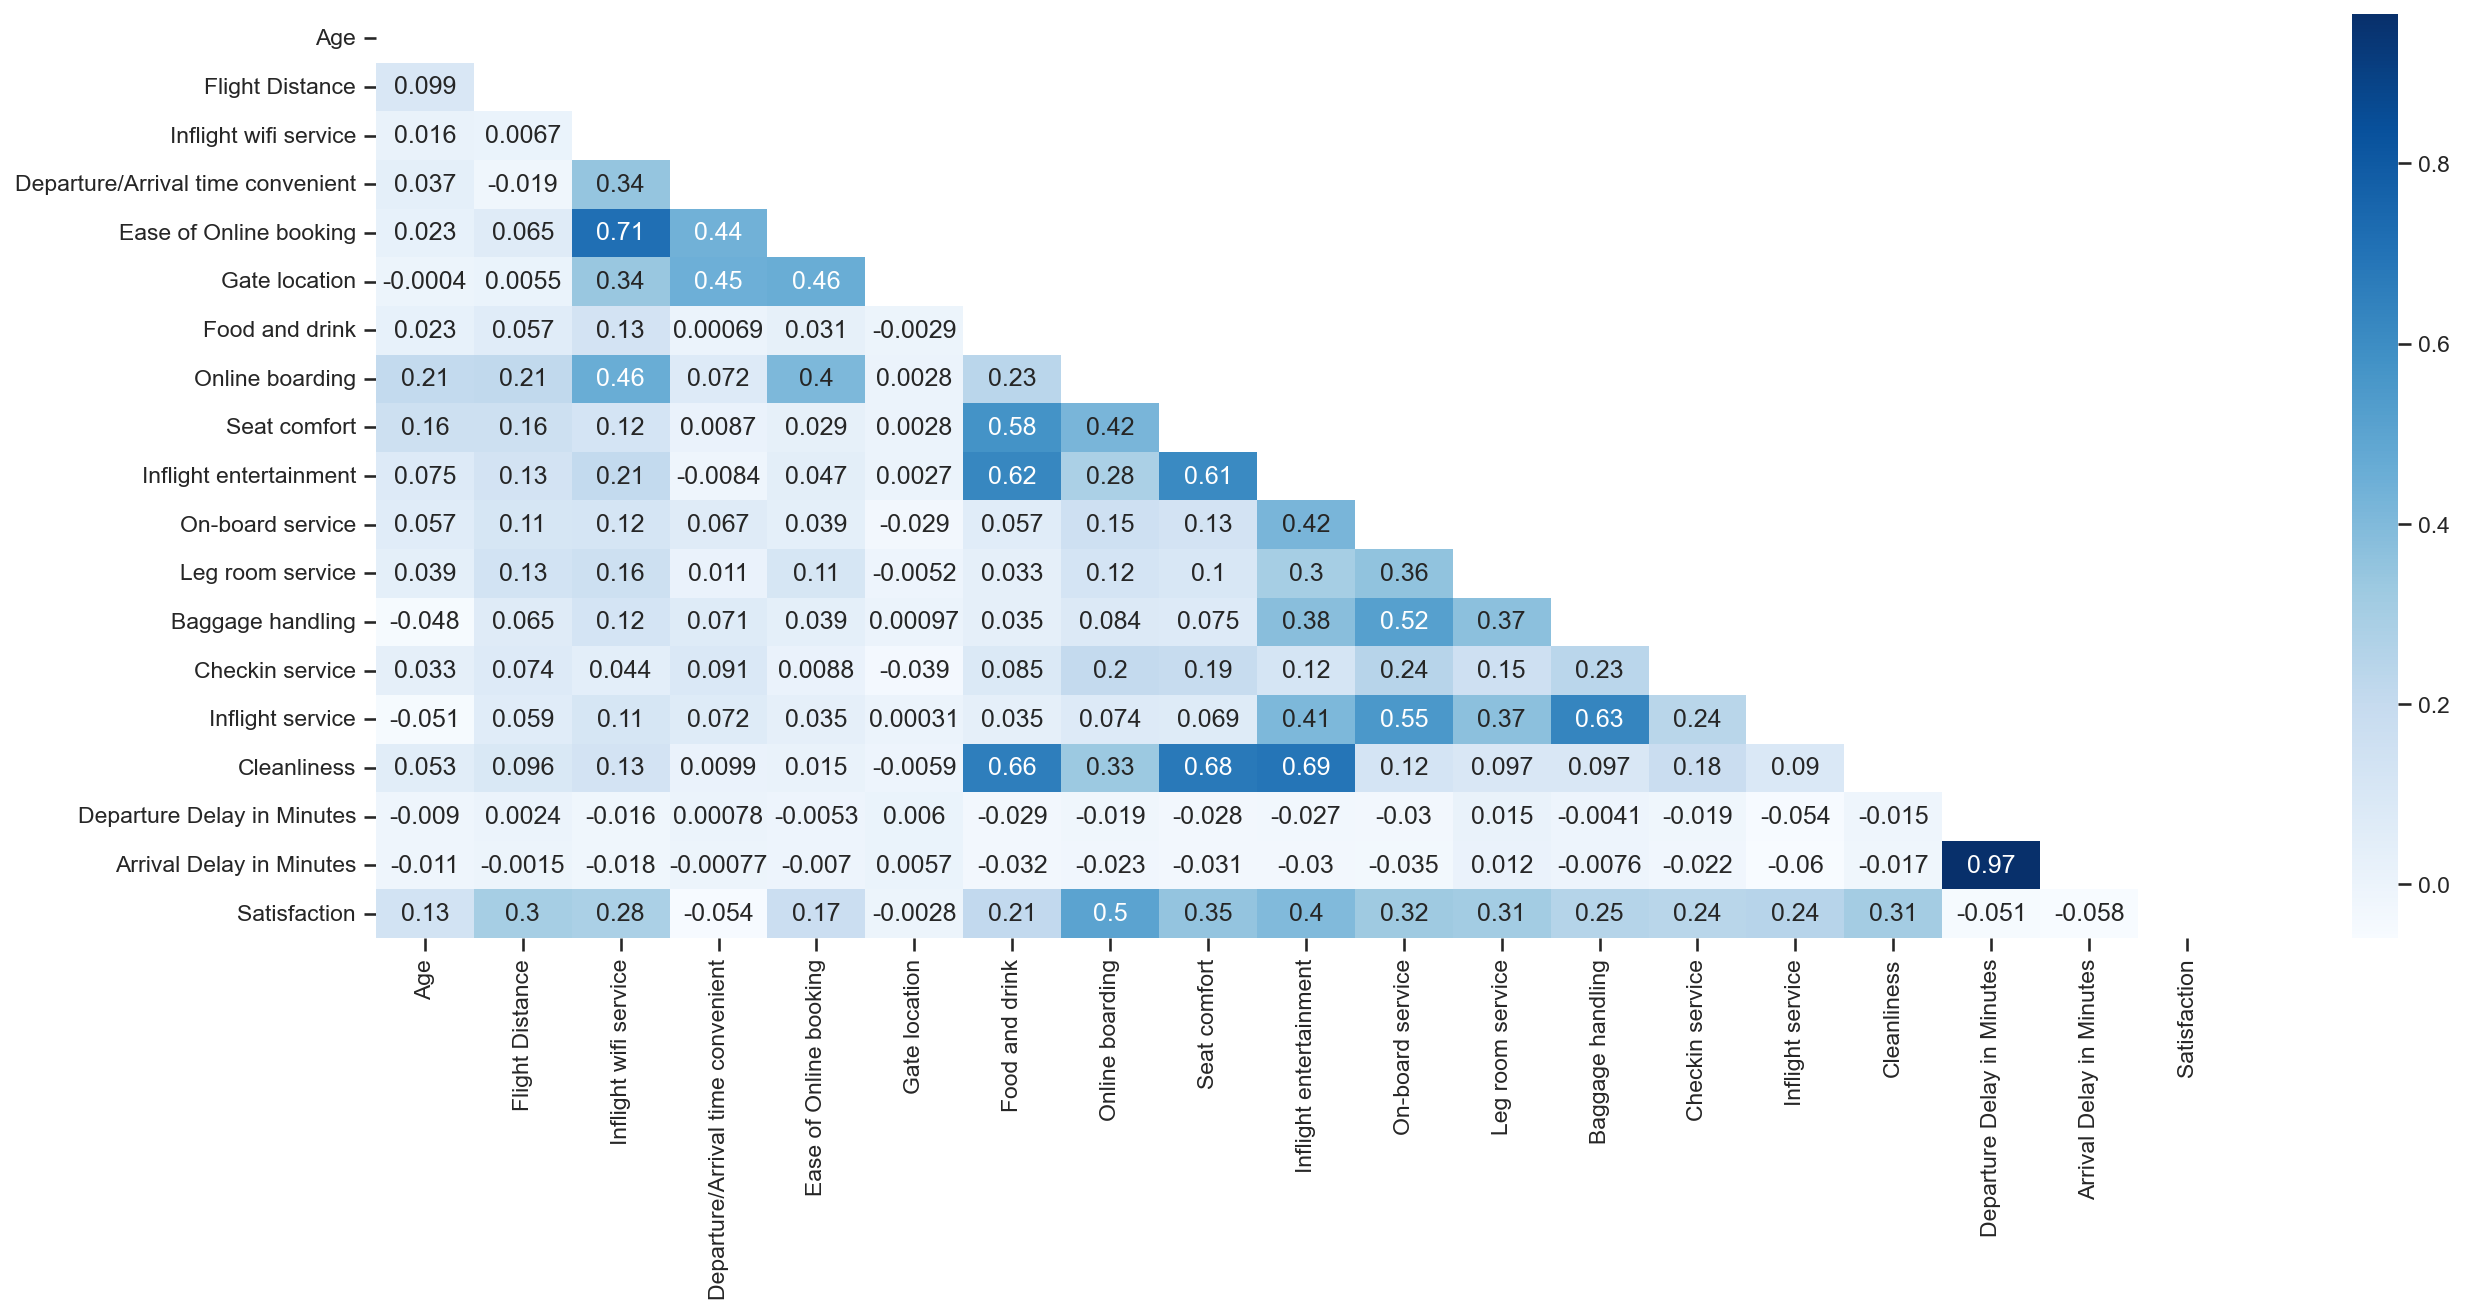

In [664]:
heatmap_df=df.copy()
heatmap_df['Satisfaction']=heatmap_df['satisfaction_v2'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
plt.figure(figsize=(20,8),dpi=150) # Set up the figure size for better visibility
# Generate the heatmap
sns.heatmap(heatmap_df._get_numeric_data().corr(),annot=True,cmap='Blues',mask=np.triu(heatmap_df._get_numeric_data().corr()))

Conclusion based on HeatMap:

1) A strong positive correlation between arrival delay and departure delay in the heatmap as expected, means that there is a systematic relationship between these two variables.

2) A very weak linear relationship between Gate location and satisfaction (r=0.00068). A correlation coefficient close to zero suggests that there is little to no linear association between the variables.This means that as Gate location changes, it doesn't have a meaningful impact on satisfaction, and vice versa.

3) A correlation coefficient (r) of 0.72 between the ratings of ease of online booking and inflight wifi service indicates a strong positive linear relationship between these two variables. In other words, passengers who find online booking easy are more likely to give higher ratings to inflight wifi service, and vice versa.

4) passengers who find online booking easy are more likely to give higher ratings to inflight wifi service, and vice versa. A correlation coefficient of 0.66, 0.68, or 0.69 still suggests a strong positive correlation between the ratings of ease of online booking and inflight wifi service.

5) Baggage handling and inflight service have a relatively strong positive correlation (r=0.63).

6) overall there are not many categories that show a significantly strong relationship with each other or with total satisfaction, it suggests that the variables in dataset may not exhibit strong linear associations.

7) Passenger satisfaction appears to be influenced by each feature in the dataset, including Online Boarding, Seat Comfort, etc., with a relatively balanced impact across these factors. The various elements contribute in a similar fashion to shaping overall satisfaction among passengers.



In [437]:
grouped = df.groupby(['Gender', 'Customer Type'])
mean_type = grouped[score_cols].mean()
display(mean_type.style.highlight_max(color = 'lightblue', axis = 0).highlight_min(color = 'yellow', axis = 0))

## Feature Selection and Engineering


In [439]:
# Import necessary libraries

import numpy as np #for numerical operations
import pandas as pd #for data manipulation and analysis
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns #statistical data visualization
from sklearn.preprocessing import StandardScaler #for feature scaling
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [440]:
df.isnull().sum()

satisfaction_v2                      0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [671]:
features = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 
            'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 
            'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 
            'Inflight entertainment', 'On-board service', 'Leg room service', 
            'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness','Arrival Delay in Minutes']

target = 'satisfaction_v2'

# Extract features and target variable
X = df[features]
y = df[target]

In [673]:
#Feature Scaling (MinMax Scaling)

#the purpose of MinMax scaling is to transform numerical features to a common scale, typically between 0 and 1.
#Brings all features to a consistent scale for fair comparison.
# Prevent features with larger numeric values from dominating the learning process.

from sklearn.preprocessing import MinMaxScaler
numerical_features = ['Age', 'Flight Distance', 'Arrival Delay in Minutes']
scaler = MinMaxScaler() # Create a MinMaxScaler instance
X_scaled = X.copy() # Create a copy of the DataFrame to avoid the warning
X_scaled.loc[:, numerical_features] = scaler.fit_transform(X_scaled.loc[:, numerical_features]) # Apply MinMax scaling to the specified numerical features

In [675]:
# data splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [444]:
print("Shape of X_train is:", X_train.shape)
print("Shape of X_test is:", X_test.shape)
print("Shape of y_train is:", y_train.shape)
print("Shape of y_test is:", y_test.shape)

Shape of X_train is: (103589, 21)
Shape of X_test is: (25898, 21)
Shape of y_train is: (103589,)
Shape of y_test is: (25898,)


In [677]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    pred_prob_test=model.predict_proba(X_test) 
    
    #calculating precision and reall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Accuracy = {}".format(accuracy))
    print('Precision: ', precision)
    print('Recall: ', recall)  
    print('F1 Score: ',f1)  
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print(classification_report(y_test,y_pred,digits=5))
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Plot ROC_AUC Curve
    # Predict probabilities on the test data
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Calculate the AUC score
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()                  
    
    return model, accuracy, precision, recall, f1, roc_auc

In [681]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'], drop_first=True)
df_encoded['satisfaction_v2'] = df_encoded['satisfaction_v2'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

features = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 
            'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 
            'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 
            'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Arrival Delay in Minutes', 'Gender_Male', 
            'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel', 
            'Class_Eco', 'Class_Eco Plus']

target = 'satisfaction_v2'
X = df_encoded[features]
y = df_encoded['satisfaction_v2']


### Logistic Regression Model

#### Logistic Regression is a statistical method used for binary classification problems. It is a type of regression analysis that is well-suited for predicting the probability of an outcome that can only have two possible values (usually 0 and 1, or True and False).

In [683]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy = 0.875538959039113
Precision:  0.8724579000644151
Recall:  0.8369526836158192
F1 Score:  0.8543365622888038
Accuracy = 0.875538959039113
ROC Area under Curve = 0.871166128809548
              precision    recall  f1-score   support

           0    0.87775   0.90538   0.89135     14648
           1    0.87246   0.83695   0.85434     11328

    accuracy                        0.87554     25976
   macro avg    0.87511   0.87117   0.87284     25976
weighted avg    0.87544   0.87554   0.87521     25976



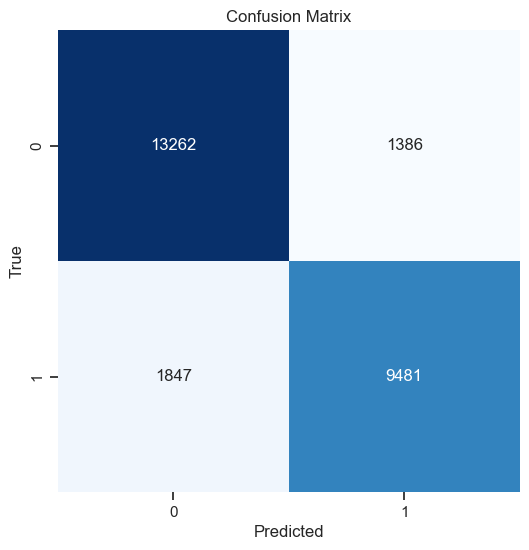

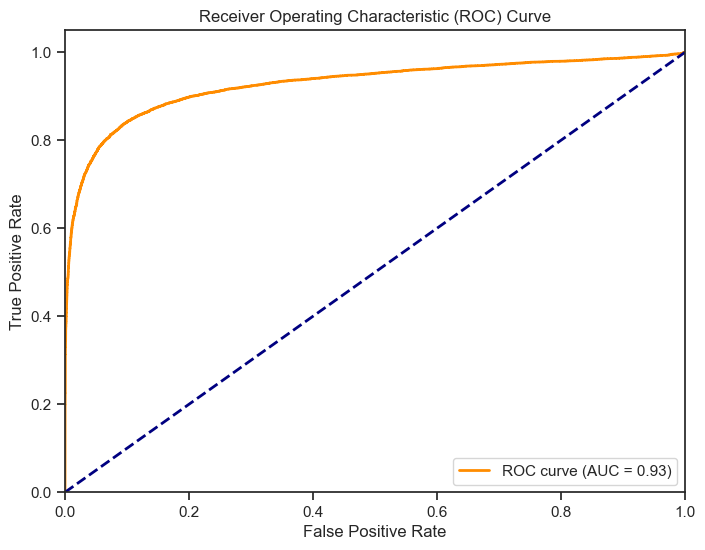

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}


In [685]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l2']  # Only 'l2' penalty is supported for lbfgs solver
}


# Perform grid search
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_hyperparameters = grid_search.best_params_

# Create a Logistic Regression model with the best hyperparameters
logistic_model_tuned = LogisticRegression(**best_hyperparameters, random_state=42)

# Train the model
logistic_model_tuned.fit(X_train_scaled, y_train)

# Evaluate the model
logistic_model_tuned, lm_accuracy, lm_precision, lm_recall, lm_f1, lm_roc_auc = run_model(
    logistic_model_tuned, X_train_scaled, y_train, X_test_scaled, y_test
)

# Print best hyperparameters
print("Best Hyperparameters:", best_hyperparameters)

### Decision Tree:

#### A Decision Tree is a predictive modeling tool used in machine learning and data mining for both classification and regression tasks. It is a tree-like structure where each internal node represents a feature or attribute, each branch represents a decision rule, and each leaf node represents the outcome or the predicted value.

In [466]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

#Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# # Evaluate the Decision Tree model using the run_model function
# dt_classifier, dt_accuracy, dt_precision, dt_recall, dt_f1, dt_roc_auc = run_model(dt_classifier, X_train_scaled, y_train, X_test_scaled, y_test)

Best Hyperparameters for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20, 'criterion': 'entropy'}
Accuracy = 0.9520426287744227
Precision:  0.9544417054688213
Recall:  0.9336429400732339
F1 Score:  0.9439277652370203
Accuracy = 0.9520426287744227
ROC Area under Curve = 0.9498498354539354
              precision    recall  f1-score   support

           0    0.95028   0.96606   0.95811     14701
           1    0.95444   0.93364   0.94393     11197

    accuracy                        0.95204     25898
   macro avg    0.95236   0.94985   0.95102     25898
weighted avg    0.95208   0.95204   0.95198     25898



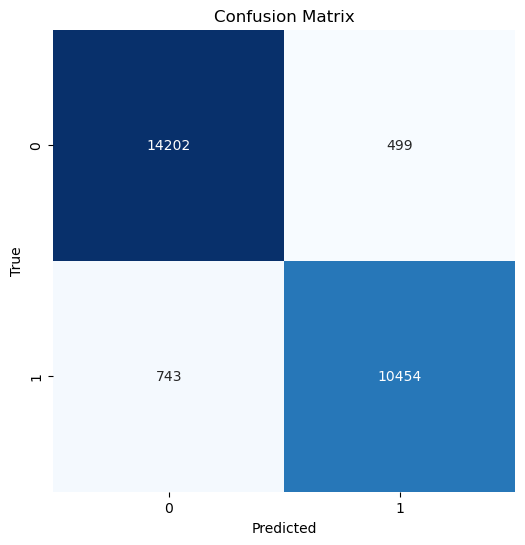

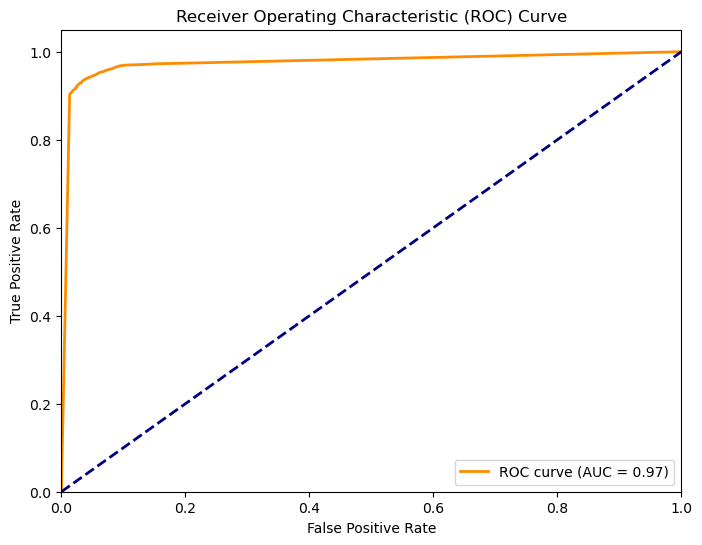

In [468]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for RandomizedSearchCV
dt_param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform randomised search
randomized_search_dt = RandomizedSearchCV(dt_classifier, param_distributions=dt_param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
randomized_search_dt.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_dt_hyperparameters = randomized_search_dt.best_params_
print("Best Hyperparameters for Decision Tree:", best_dt_hyperparameters)

# Evaluate the Decision Tree model with the best hyperparameters
dt_classifier_best = randomized_search_dt.best_estimator_
dt_classifier_best, dt_accuracy, dt_precision, dt_recall, dt_f1, dt_roc_auc = run_model(
    dt_classifier_best, X_train_scaled, y_train, X_test_scaled, y_test)

### Random Forest

#### Random Forest is an ensemble learning method that builds multiple decision trees during training and outputs the average prediction for regression or the mode prediction for classification. It introduces randomness by considering a random subset of features at each split and building diverse trees. The final prediction is determined by combining the predictions of individual trees.

Best Hyperparameters for Random Forest: {'n_estimators': 60, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Accuracy = 0.9619275619738976
Precision:  0.9703362505757716
Recall:  0.9406984013575065
F1 Score:  0.955287502267368
Accuracy = 0.9619275619738976
ROC Area under Curve = 0.9593975647356201
              precision    recall  f1-score   support

           0    0.95586   0.97810   0.96685     14701
           1    0.97034   0.94070   0.95529     11197

    accuracy                        0.96193     25898
   macro avg    0.96310   0.95940   0.96107     25898
weighted avg    0.96212   0.96193   0.96185     25898



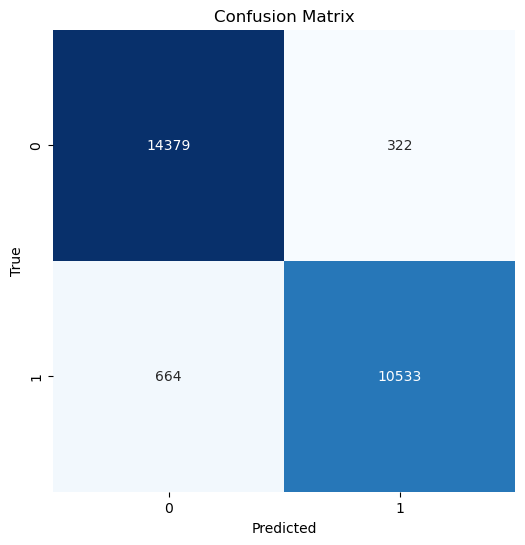

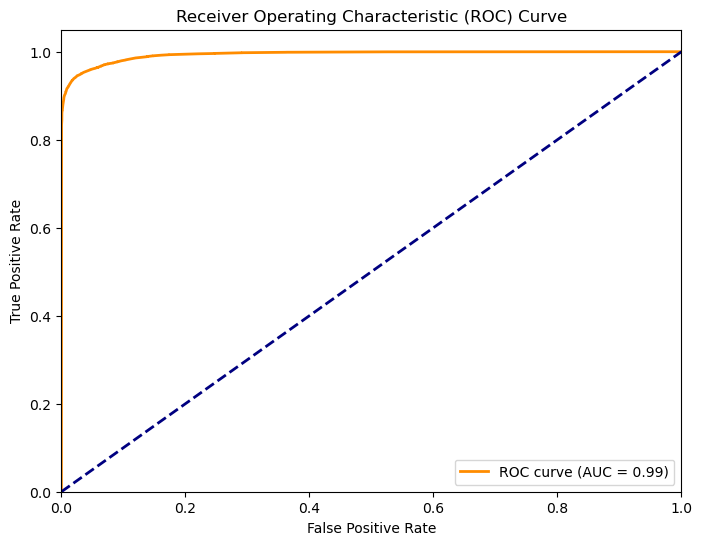

In [479]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for RandomizedSearchCV
rf_param_dist = {
    'n_estimators': [40, 50, 60],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform randomized search
randomized_search_rf = RandomizedSearchCV(rf_classifier, param_distributions=rf_param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
randomized_search_rf.fit(X_train_scaled, y_train)


# Get the best hyperparameters
best_rf_hyperparameters = randomized_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_rf_hyperparameters)

# Evaluate the Random Forest model with the best hyperparameters
rf_classifier_best = randomized_search_rf.best_estimator_
rf_classifier_best,rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc = run_model(
    rf_classifier_best, X_train_scaled, y_train, X_test_scaled, y_test)

## Model Comparison

In [495]:
import pandas as pd
# Accuracy scores for each model
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy_scores = [lm_accuracy, dt_accuracy, rf_accuracy]

# Create a DataFrame for model comparison
accuracy_data = {
    'Model': model_names,
    'Accuracy': accuracy_scores
}

accuracy_table = pd.DataFrame(accuracy_data)

# Sort the table by 'Accuracy' in descending order
accuracy_table = accuracy_table.sort_values(by='Accuracy', ascending=False)

# Apply styling to the table with a black border for each cell and hide the index column
styled_accuracy_table = accuracy_table.style.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', 'white'), ('color', 'black')]},
    {'selector': 'th, td', 'props': [('border', '1px solid black'), ('padding', '8px'), ('background-color', 'white'), ('color', 'black')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
    {'selector': 'tr:hover', 'props': [('background-color', 'lightyellow')]}
]).set_table_attributes('border="1"').set_properties(**{'text-align': 'center'})

# Display the styled accuracy table
styled_accuracy_table

,Model,Accuracy
2,Random Forest,0.961928
1,Decision Tree,0.952043
0,Logistic Regression,0.874122


In [497]:
# ROC AUC scores for each model
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
roc_auc_scores = [lm_roc_auc, dt_roc_auc, rf_roc_auc]

# Create a DataFrame for model comparison
roc_auc_data = {
    'Model': model_names,
    'ROC AUC': roc_auc_scores
}

roc_auc_table = pd.DataFrame(roc_auc_data)

# Sort the table by 'ROC AUC' in descending order
roc_auc_table = roc_auc_table.sort_values(by='ROC AUC', ascending=False)

# Apply styling to the table with a black border for each cell
styled_roc_auc_table = roc_auc_table.style.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', 'white'), ('color', 'black')]},
    {'selector': 'th, td', 'props': [('border', '1px solid black'), ('padding', '8px'), ('background-color', 'white'), ('color', 'black')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
    {'selector': 'tr:hover', 'props': [('background-color', 'lightyellow')]}
])

# Display the styled ROC AUC table
styled_roc_auc_table

,Model,ROC AUC
2,Random Forest,0.993586
1,Decision Tree,0.974762
0,Logistic Regression,0.926749


In [499]:

# Evaluation metrics for each model
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy_scores = [lm_accuracy, dt_accuracy, rf_accuracy]
precision_scores = [lm_precision, dt_precision, rf_precision]
recall_scores = [lm_recall, dt_recall, rf_recall]
f1_scores = [lm_f1, dt_f1, rf_f1]
roc_auc_scores = [lm_roc_auc, dt_roc_auc, rf_roc_auc]

# Create a DataFrame for model comparison
model_comparison_data = {
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'ROC AUC': roc_auc_scores
}

model_comparison_table = pd.DataFrame(model_comparison_data)

# Sort the table by 'Accuracy' in descending order
model_comparison_table = model_comparison_table.sort_values(by='Accuracy', ascending=False)

# Apply styling to the table with a black border for each cell
styled_table = model_comparison_table.style.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', 'white'), ('color', 'black')]},
    {'selector': 'th, td', 'props': [('border', '1px solid black'), ('padding', '8px'), ('background-color', 'white'), ('color', 'black')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
    {'selector': 'tr:hover', 'props': [('background-color', 'lightyellow')]}
])

# Display the styled model comparison table
styled_table

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
2,Random Forest,0.961928,0.970336,0.940698,0.955288,0.993586
1,Decision Tree,0.952043,0.954442,0.933643,0.943928,0.974762
0,Logistic Regression,0.874122,0.868785,0.834956,0.851535,0.926749


#### Summary:

##### 1) Random Forest stands out as the top-performing model with the highest accuracy and well-balanced precision and recall.

##### 2) Decision Tree is also a great model with high accuracy and balanced precision and recall.

##### 3) Logistic Regression have lowest accuracy compared to the other models.